Osnabrück University - Machine Learning (Summer Term 2021) - Prof. Dr.-Ing. G. Heidemann, Axel Schaffland, Ulf Krumnack

# Exercise Sheet 04: Clustering

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, May 18, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

In the following tasks we will be relying on numpy. Using the following import we expect it to be in global scope as `np`. Therefore we can, after executing the following cell, use stuff like `np.array` and `np.sqrt`. Check out the [NumPy Reference](http://docs.scipy.org/doc/numpy/reference/index.html) and especially search it using e.g. [Google Site Search](https://www.google.de/search?q=array+site%3Adocs.scipy.org%2Fdoc%2Fnumpy)! You can also try `np.lookfor('keyword search docstrings')` to get help.

In [1]:
import numpy as np
np.lookfor('get array diagonal')

# Try other queries here
np.lookfor('identity matrix')

Search results for 'get array diagonal'
---------------------------------------
numpy.fill_diagonal
    Fill the main diagonal of the given array of any dimensionality.
numpy.mask_indices
    Return the indices to access (n, n) arrays, given a masking function.
numpy.random.Generator.multivariate_normal
    Draw random samples from a multivariate normal distribution.
numpy.random.RandomState.multivariate_normal
    Draw random samples from a multivariate normal distribution.
Search results for 'identity matrix'
------------------------------------
numpy.matlib.identity
    Returns the square identity matrix of given size.
numpy.matlib.eye
    Return a matrix with ones on the diagonal and zeros elsewhere.
numpy.linalg.matrix_power
    Raise a square matrix to the (integer) power `n`.
numpy.poly
    Find the coefficients of a polynomial with the given sequence of roots.
numpy.linalg.LinAlgError
    Generic Python-exception-derived object raised by linalg functions.
numpy.random.Generator

## Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

An eigenvector of a matrix is the vector corresponding to its direction (?). Any multiples of the eigenvector scales the original vector. Eigenvalues are the factors by which the eigenvectors are scaled.

**b)** What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

The characteristic polynomial of a matrix gives the eigenvalues after computing the 0-values of the characteristic function. 

**c)** What is the spectrum of a matrix? What does the spectral theorem state?

The specturm is the amount of eigenvalues. 

**d)** [bonus task]: Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

In [39]:
#np.linalg.eig()  input = quadratic matrix

# Clustering

## Assignment 1: Distance Measures for Clusters [5 Points]

### a) Point and cluster distances

Explain the difference of point and cluster distances and their relation to each other. Give examples.

Point distances refers to either min or max distances between two points while cluster distances refers to the distance between a mean of points or centroids. 

### b) Mean and centroid distance

* Describe how the cluster metrics *mean distance* and *centroid distance* work.
* What formal requirements do they have?
* What is their computational complexity? 
* Give a numerical example of clusters (with cluster size at least 2), where they lead to (a) the same result and (b) different results.

Mean distance: 

- Takes a sum of a group of data points and divides between amount of points in the group
- Complexity: O(n * k)   ( n = number of clusters, k = dimension )

Centroid distance:

- Take each points X direction, compute the mean, the take each points Y direction and compute the mean again, this results in the distance of of centers
- Complexity: O(k * logn)   ( n = number of clusters, k = dimension )

Example: 

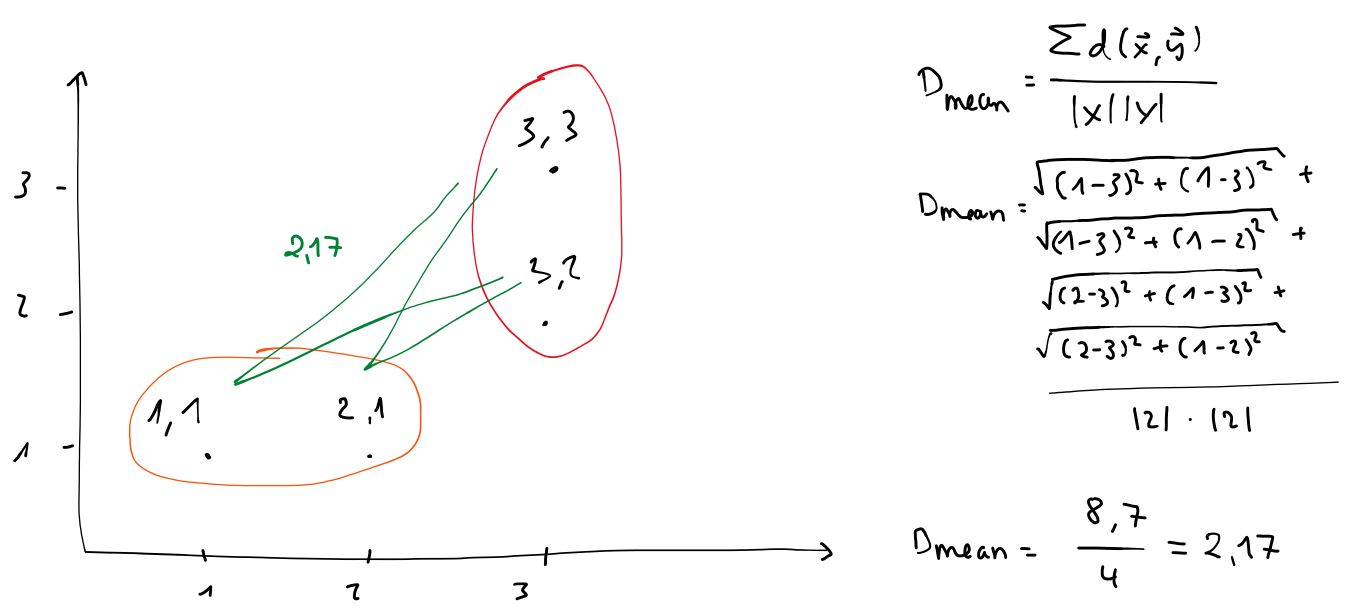



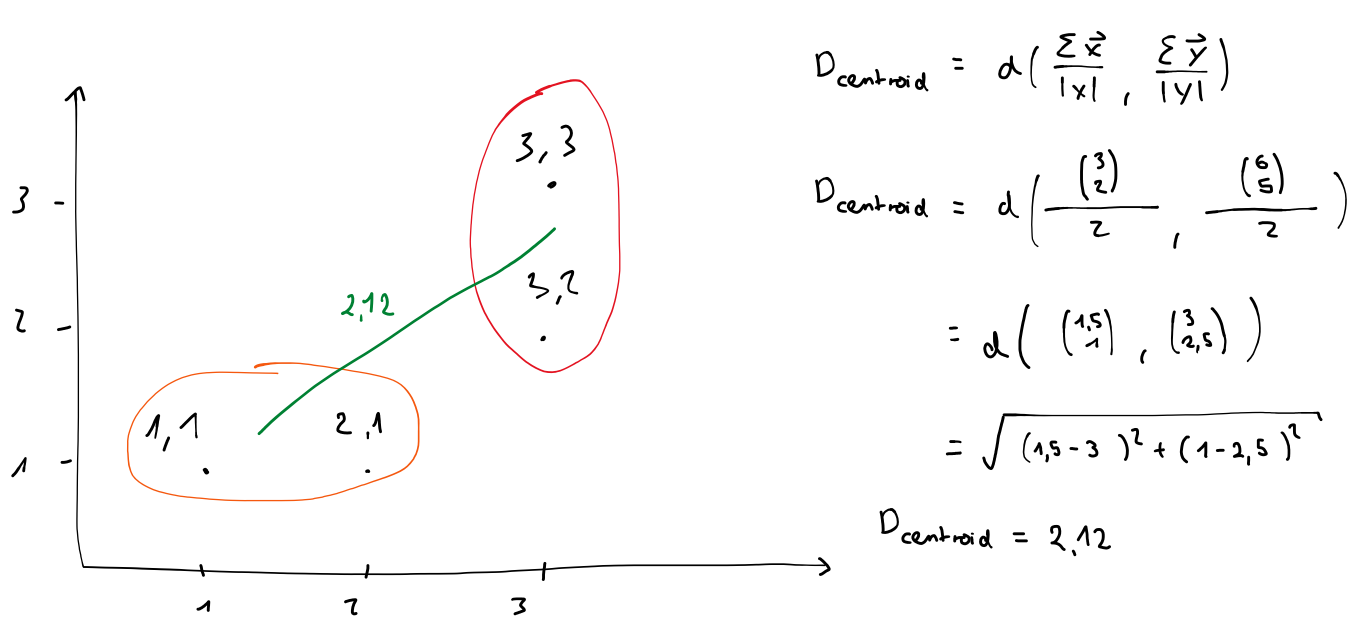

### c) Implemention of  mean and centroid distance

Now implement the $d_{mean}$ and $d_{centroid}$ distance from the lecture. Each function expects two clusters each represented by a 2-dimensional numpy array, where the number of columns $n$ reflects the dimensionality of the data space and has to agree for both clusters, while the number of rows $mx$ and $my$ can vary from cluster to cluster. The return value is the respective distance.  Use the Euclidean distance as underlying metric.

Hint: you may consider using the function `scipy.spatial.distance.cdist`. Consult the documentation to find out how to use it.

In [2]:
from scipy.spatial.distance import cdist
import numpy as np

def d_mean(cluster1, cluster2):
    """
    Mean distance between points of two clusters.
   
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The mean distance between the points in the two clusters.
    """
    
    mean_d = 1/(len(cluster1)*len(cluster2)) * np.sum(cdist(cluster1,cluster2,'euclidean'))
    
    return float(mean_d)
    

x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21], [5,45,1], [1,12,7]])

epsilon = 1e-3
assert abs(d_mean(x, y) - 22.297) < epsilon, "Result is not correct: {}".format(d_mean(x, y))
assert d_mean(x, y) == d_mean(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_mean(x, y), d_mean(y, x))

In [7]:
def d_centroid(cluster1, cluster2):
    """
    Calculate the distance between the centroids of two clusters.
    
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The distance between the centroids of two clusters.
    """
    
    c_1 = ((sum(cluster1)/len(cluster1)))
    c_2 = ((sum(cluster2)/len(cluster2)))
 
    cen = np.sum(cdist(c_1.reshape(1,-1),c_2.reshape(1,-1) ,'euclidean'))
    
    return float(cen)


x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21]])
z = np.array([[-2,0], [-1,100]])
w = np.array([[2,0], [1,100], [1,-100], [1,-20]])

epsilon = 1e-3
assert abs(d_centroid(x, y) - 20.785) < epsilon, "Result is not correct: {}".format(d_centroid(x, y))
assert abs(d_centroid(z, w) - 55.069) < epsilon, "Result is not correct: {}".format(d_centroid(z, w))
assert d_centroid(x, y) == d_centroid(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_centroid(x, y), d_centroid(y, x)) 

 ## Assignment 2: Hierarchical Clustering [6 Points]
 
 Consider the following matrix of distances
 
|       |  a  |  b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|-----|
| **a** |  0  |  2  |  6  |  10 |  9  |
| **b** |  2  |  0  |  5  |  9  |  8  |
| **c** |  6  |  5  |  0  |  4  |  5  |
| **d** |  10 |  9  |  4  |  0  |  3  |
| **e** |  9  |  8  |  5  |  3  |  0  |
 

### a) Perform agglomerative clustering

Do *agglomerative* average linkage clustering by hand (i.e. employing the *mean* cluster distance). Analyze how many alternatives you have to consider at each step.

| Step 0|  a  |  b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|-----|
| **a** |  0  |     |     |     |     |
| **b** |  2  |  0  |     |     |     |      
| **c** |  6  |  5  |  0  |     |     |
| **d** |  10 |  9  |  4  |  0  |     |
| **e** |  9  |  8  |  5  |  3  |  0  |

Perform cluster on smallest distance: a,b  (total alternatives: 10)

| Step 1|  a,b  |  c  |  d  |  e  |
|-------|-------|-----|-----|-----|
| **a,b** |  0  |     |     |     | 
| **c**   | 5,5 |  0  |     |     |
| **d**   | 9,5 |  4  |  0  |     |
| **e**   | 8,5  |  5  |  3  |  0  |

Perform cluster on smallest distance: d,e (total alternatives: 6)

| Step 2|  a,b  |  c  |  d,e  |
|-------|-------|-----|-----|
| **a,b** |  0  |     |     |
| **c**   | 5,5 |  0  |     |
| **d,e**   | 9 |  4,5  |  0  |

Perform cluster on smallest distance: (d,e),c (total alternatives: 3)

| Step 3|  a,b  |  d,e,c  |
|-------|-------|---------|
| **a,b**   |  0  |       |
| **d,e,c** | 7,25 |  0    |

Perform cluster on only distance left: (a,b),(d,e,c) (total alternatives: 1)

| Step 4|  a,b,d,e,c  |
|-------|-------|
| **a,b,d,e,c**   |  0  |

total alternatives: 0

### b) Perform divisive clustering

Now try to do divisive average linkage clustering. Again, analyze how many splits are possible in the first step? Think of a strategy that allows to reduce this number and use this in your computation.

|       |  a  |  b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|-----|
| **a** |  0  |     |     |     |     |
| **b** |  2  |  0  |     |     |     |      
| **c** |  6  |  5  |  0  |     |     |
| **d** |  10 |  9  |  4  |  0  |     |
| **e** |  9  |  8  |  5  |  3  |  0  |

The first cluster is A = (a,b,c,d,e)

|       |  a,b,c,d,e |
|-------|-----|
| **a,b,c,d,e** |  0  |


1. The average distances between each point in the cluster is: 

a : (a,b) + (a,c) + (a,d) + (a,e) / 4 = 6,75

b : (b,a) + (b,c) + (b,d) + (b,e) / 4 = 6

c : (c,a) + (c,b) + (c,d) + (c,e) / 4 = 5

d : (d,a) + (d,b) + (d,c) + (d,e) / 4 = 6,5

e : (e,a) + (e,b) + (e,c) + (e,d) / 4 = 6,25

We choose the point (a) with the farthest distance to the rest of the points as cluster B: 

- Clusters: A = (b,c,d,e) B = (a)

| Step 1|  b,c,d,e  |  a  |
|-------|-------|---------|
| **b,c,d,e**   |  0  |   |
| **a** | 6,75 |  0    |

2. The new average distances between each point in the cluster A is: 

b : (b,c) + (b,d) + (b,e) / 3 = 7,3

c : (c,b) + (c,d) + (c,e) / 3 = 4,6

d : (d,b) + (d,c) + (d,e) / 3 = 5,3

e : (e,b) + (e,c) + (e,d) / 3 = 5,3

2.1 We choose the point (b) with the farthest distance to the rest of the points as cluster C. Are the new outliers new clusters or do they belong to B? : 

b : 7,3 - (b,a) = 5,3      -- The point (b) is closest to cluster B than having own cluster C = merge to B

c : 4,6 - (c,a) = -2,6

d : 5,3 - (d,a) = -4,7

e : 5,3 - (e,a) = -3,7

- Clusters: A = (c,d,e) B = (a,b)

| Step 2|  c,d,e  |  a,b  |
|-------|-------|---------|
| **c,d,e**   |  0  |   |
| **a,b** | 7,025 |  0    |

3. The new average distances between each point in the cluster A is: 

c : (c,d) + (c,e) / 2 = 4,5

d : (d,c) + (d,e) / 2 = 3,5

e : (e,c) + (e,d) / 2 = 4

2.1 We choose the point (c) with the farthest distance to the rest of the points as cluster C. Are the new outliers new clusters or do they belong to B? : 

c : 4,5 - (c,(a,b)) = -1

d : 3,5 - (d,(a,b)) = -6

e : 4 - (e,(a,b)) = -4,5

All are negative, point (c) is its own bew cluster C. 

- Clusters: A = (d,e) B = (a,b) C = (c)

| Step 3    |  d,e  |  a,b    | c    |
|-----------|-------|---------|------|
| **d,e**   |  0    |         |      |
| **a,b**   | 7,025 |  0      |      |
| **c**     | 4,5   |  9,5    |  0   |

4. We split the clusters with the largest diameter 

Cluster A: (d,e) = 3
Cluster B: (a,b) = 2

Cluster A is splitted into Clusters D = (d) and E = (e)

- Clusters: B = (a,b) C = (c) D = (d) E = (e)

| Step 4|  a,b  |  c  |  d  |  e  |
|-------|-------|-----|-----|-----|
| **a,b** |  0  |     |     |     | 
| **c**   | 5,5 |  0  |     |     |
| **d**   | 9,5 |  4  |  0  |     |
| **e**   | 8,5  |  5  |  3  |  0  |

5. We split the clusters with the largest diameter 

Cluster B: (a,b) = 2

Cluster B is splitted into Clusters F = (a) and G = (b)

- Clusters: C = (c) D = (d) E = (e) F = (a) G = (b)

| Step 5|  a  |  b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|-----|
| **a** |  0  |     |     |     |     |
| **b** |  2  |  0  |     |     |     |      
| **c** |  6  |  5  |  0  |     |     |
| **d** |  10 |  9  |  4  |  0  |     |
| **e** |  9  |  8  |  5  |  3  |  0  |


### c) Linkage criteria

In the following you find implementations for single- and complete-linkage clustering. Take a look at the code  and answer the question posted below. You may of course change parameters and try it out on different datasets (`points.txt` & `clusterData.txt` are provided).

Note that for performance reasons the code differs from the lecture's pseudocode (ML-05 Slide 8), but in general it does the same.

In [8]:
from scipy.spatial.distance import cdist

def linkage(data, k=5, complete=False):
    """
    Runs single or complete linkage clustering.
    
    Args:
        data (ndarray): Data points to be clustered in an array with shape (num_points, 2).
        k (int): Number of clusters.
        complete (bool): Whether to run complete linkage clustering.
        
    Returns:
        ndarray: The cluster labels for each data point. Shape is (num_points).
    """
    # Initially all points are their own cluster.
    labels = np.arange(len(data))

    # Calculate distance between all points.
    # Also removing half of the matrix because 
    # its symmetrical along the diagonal.
    dst = np.tril(cdist(data, data))

    while len(set(labels)) > k:
        # Get the lowest distance of two points which
        # do not have the same label.
        r, c = np.where(dst == np.min(dst[dst > 0]))
        
        # Ignore the case when there are multiple with
        # equally smallest distance.
        r = r[0]
        c = c[0]

        # The two points are now in the same cluster,
        # so they have a distance of 0 now.
        dst[r, c] = 0

        # Make the two clusters have the same label.
        labels[labels == labels[r]] = labels[c]

        # Check if we want to do complete linkage clustering.
        if complete:
            # Update the distances of the points which are not in the same cluster.
            for i in np.nonzero(dst[r, :] > 0)[0]:
                dst[r, i] = np.max(cdist(data[i, None], data[labels == labels[r], :]))

            # The distances to c are now the same as to r, so we can just
            # set them to zero - would be duplicates otherwise.
            dst[:, c] = 0

    return labels

Single Linkage Clustering:
Label:   10,  Occurence:   71
Label:   48,  Occurence:    1
Label:   62,  Occurence:   75
Label:  107,  Occurence:   27
Label:  118,  Occurence:    1
Complete Linkage Clustering:
Label:   10,  Occurence:   42
Label:   15,  Occurence:   40
Label:  104,  Occurence:   29
Label:  118,  Occurence:   37
Label:  136,  Occurence:   27


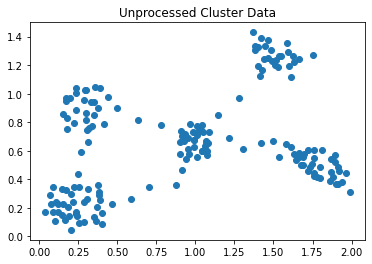

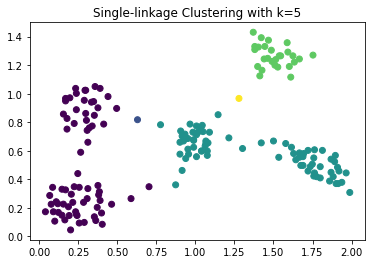

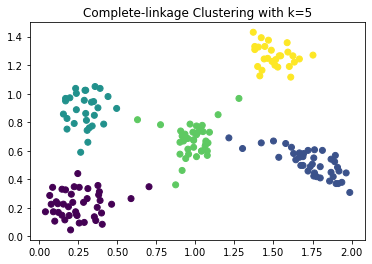

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Read the data.
data = np.loadtxt('points.txt')

# Show unprocessed data set.
fig_cluster = plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.title('Unprocessed Cluster Data')
fig_cluster.canvas.draw()

# Apply Single Linkage Clustering
labels = linkage(data, k=5, complete=False)
unique, inverse, counts = np.unique(labels, return_inverse=True, return_counts=True)
print("Single Linkage Clustering:")
# Print the unqiue labels and their occurence
for u, c in zip(unique, counts):
    print("Label: {:4},  Occurence: {:4}".format(u, c))    
# Replace labels by continuous values starting from 1 for discernible colors in plot
labels = np.arange(1,unique.size+1)[inverse]
fig_single = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Single-linkage Clustering with k=5')
fig_single.canvas.draw()


# Apply Complete Linkage Clustering
labels = linkage(data, k=5, complete=True)
unique, inverse, counts = np.unique(labels, return_inverse=True, return_counts=True)
print("Complete Linkage Clustering:")
for u, c in zip(unique, counts):
    print("Label: {:4},  Occurence: {:4}".format(u, c))    
labels = np.arange(1,unique.size+1)[inverse]
fig_complete = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Complete-linkage Clustering with k=5')
fig_complete.canvas.draw()



# Test different parameters above
# YOUR CODE HERE

What is the difference between single- and complete-linkage clustering and which is the better solution given the dataset?

- Single linkage clustering means that the algorithm will cluster the points (or clusters) of minimal distance, while complete linkage clusters the points (or clusters) of maximal distance to eachother. Single linkage therefore tends to chaining and complete linkage prefers compact clusters.

- The better solution for this dataset has to be the complete linkage clustering. When using the single linkage clusters, the purple clusters are chained together and there is just a single yellow cluster with a single data point, not clustering equally. 

## Assignment 3: k-means Clustering [9 Points]

### a) Implement k-means clustering. Plot the results for $k = 7$ and $k = 3$ in colorful scatter plots.

How could one handle situations when one or more clusters end up containing 0 elements? Handle these situtation in your code.

In [32]:
from scipy.spatial.distance import cdist

def kmeans(data, k=3):
    """
    Applies kmeans clustering to the data using k initial clusters.
    data is expected to be a numpy array of size n*2, 
    n being the amount of observations in the data. This function returns
    the centroids and the labels for the clusters data (1,1,3,5,5,5,...)
    """
    
    clusters = np.random.randint(0, k, len(data))
    
    distance = []
        
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            
            distance.append(cdist(data[i].reshape(1,-1),data[j].reshape(1,-1),'euclidean'))
            
    print(min(distance))
    

    return labels, centroids

In [33]:
%matplotlib inline

data = np.loadtxt('clusterData.txt')


# Test different ks here
# YOUR CODE HERE
for k in [3,7]:
#for k in [7]*5:    
    labels, centroids = kmeans(data, k)

    kmeans_fig = plt.figure('k-means with k={}'.format(k))
    plt.scatter(data[:,0], data[:,1], c=labels)
    plt.scatter(centroids[:,0], centroids[:,1], 
                c=list(set(labels)), alpha=.1, marker='o',
                s=np.array([len(labels[labels==label]) for label in set(labels)])*100)
    plt.title('k = '+str(k))
    kmeans_fig.canvas.draw()

plt.show()
    
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



NameError: name 'labels' is not defined

In [ ]:
data = np.loadtxt('clusterData.txt')
print(data)

### b) Why might the clustering for k=7 not look optimal? 

YOUR ANSWER HERE